In [87]:
import sys  
!{sys.executable} -m pip install --user matplotlib
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
 #ml library
from sklearn.linear_model import LinearRegression

In [24]:
df=pd.read_csv('Salary_Data.csv')

In [25]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


##### visualize relation between data using plotly

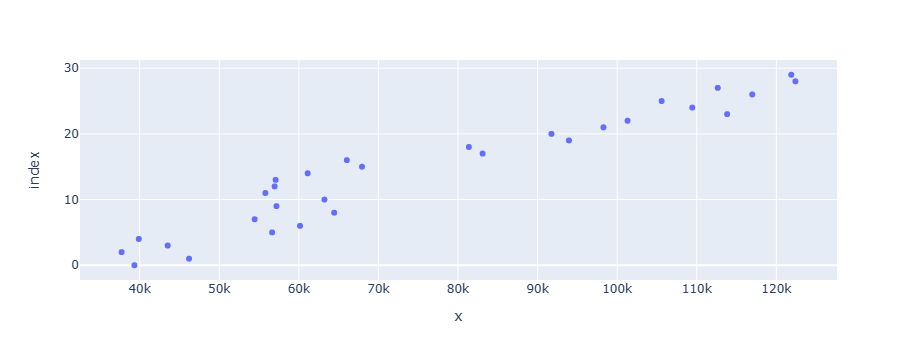

In [118]:
fig=px.scatter(df['YearsExperience'],df['Salary'])
fig.show()

In [124]:
#assign x,y
z=df['YearsExperience']
p=df['Salary']
a=np.array(z)
x=a.reshape(-1, 1)
b=np.array(p)
y=b.reshape(-1, 1)

In [125]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [126]:
#Build_model
model = LinearRegression()
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
y_predict

array([[114461.48269643],
       [ 35792.91184759],
       [ 71381.07485064],
       [ 53586.99334912],
       [102286.58482696],
       [ 99476.99301093]])

In [127]:
y_test

array([[116969.],
       [ 39343.],
       [ 67938.],
       [ 60150.],
       [113812.],
       [101302.]])

#### Visualize

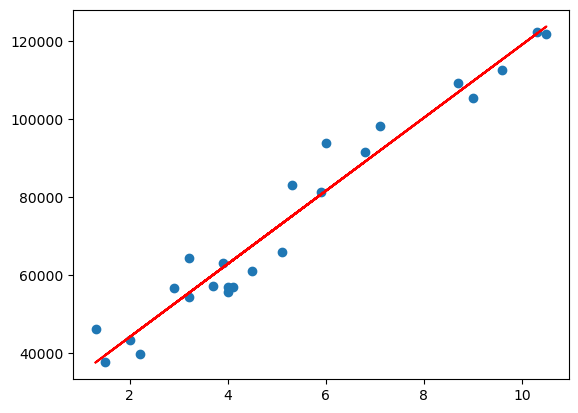

In [128]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')

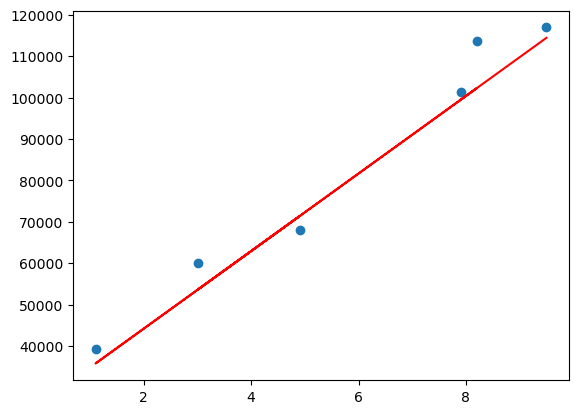

In [129]:
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test),color='red')

In [130]:
df2=pd.DataFrame({'actual':y_test.flatten(),'prediction':y_predict.flatten()})
df2

,actual,prediction
0,116969.0,114461.482696
1,39343.0,35792.911848
2,67938.0,71381.074851
3,60150.0,53586.993349
4,113812.0,102286.584827
5,101302.0,99476.993011


<AxesSubplot:>

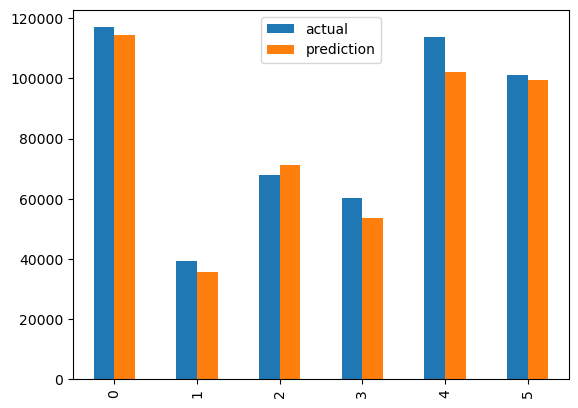

In [131]:
df2.plot(kind='bar')

________________________

In [132]:
import statsmodels.api as sm # strong libraryin statics

In [133]:
x_stat=sm.add_constant(x_train) #for add inputs
model2=sm.OLS(y_train,x_stat).fit()

In [134]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     458.5
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.19e-16
Time:                        03:21:46   Log-Likelihood:                -241.09
No. Observations:                  24   AIC:                             486.2
Df Residuals:                      22   BIC:                             488.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.549e+04   2566.580      9.932      0.000    2.02e+04    3.08e+04
x1          9365.3061    437.392     21.412      0.000    8458.211    1.03e+04
==============================================================================
Omnibus:                        1.800   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.554
Skew:                           0.507   Prob(JB):                        0.460
Kurtosis:                       2.276   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""